## Section 1. Retrieving Data from URL, SQL Server, and Azure Blob Storage

### Read Data from URL

In [3]:
import pandas as pd
import io
import requests
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
s = requests.get(url).content
c = pd.read_csv(io.StringIO(s.decode('utf-8')))
c.columns = ["age", "workclass", "fnlwgt", "education", "education_num", \
                    "marital-status", "occupation", "relationship", "race", "sex", \
                    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]
c.head()

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Read Data from SQL Server (DO NOT Run in CLASS) -- SQLAlchemy for mac

In [ ]:
import pyodbc
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER=<server URL>; DATABASE=<database name>; UID=<user id>;PWD= <pwd>')
cursor = cnxn.cursor()
cursor.execute("SELECT WORK_ORDER.TYPE,WORK_ORDER.STATUS, WORK_ORDER.BASE_ID, WORK_ORDER.LOT_ID FROM WORK_ORDER")
for row in cursor.fetchall():
    print row
cursor.close()
cnxn.close()

### Read Azure Blob Storage

In [2]:
from azure.storage.blob import BlockBlobService
blob_account_name = "uwcoursestorage"
import getpass
storage_key = getpass.getpass("Please input the storage account key:")
block_blob_service = BlockBlobService(account_name=blob_account_name, account_key=storage_key)
generator = block_blob_service.list_blobs('testdata')
print("Blob names in container are:")
for blob in generator:
    print(blob.name)
block_blob_service.get_blob_to_path('testdata', 'RetailChurnData.csv', 'RetailChurnData.csv')

df = pd.read_csv("RetailChurnData.csv", header=0)
df.head()

Please input the storage account key:········


KeyboardInterrupt: 

### Concatenate Data Frames

In [6]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], \
                    'B': ['B0', 'B1', 'B2', 'B3'], \
                    'C': ['C0', 'C1', 'C2', 'C3'], \
                    'D': ['D0', 'D1', 'D2', 'D3']}, \
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'], \
                    'B': ['B4', 'B5', 'B6', 'B7'], \
                    'C': ['C4', 'C5', 'C6', 'C7'], \
                    'D': ['D4', 'D5', 'D6', 'D7']},\
                   index=[4, 5, 6, 7]) 

frames = [df1, df2]

result = pd.concat(frames)  # Rows
result = pd.concat(frames, axis = 1)  # Columns
## To deal with the NaN, change the index in df2 to the same indicies of df1
result.head(10)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7


### Join two Data Frames

In [3]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'], \
                     'A': ['A0', 'A1', 'A2', 'A3'], \
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'], \
                      'C': ['C0', 'C1', 'C2', 'C3'], \
                      'D': ['D0', 'D1', 'D2', 'D3']})


result = pd.merge(left, right, on='key')
result.head()

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


In [4]:
right1 = pd.DataFrame({'key': ['K0', 'K1', 'K3'], \
                      'C': ['C0', 'C1', 'C3'], \
                      'D': ['D0', 'D1', 'D3']})
result1 = pd.merge(left, right1, on='key') # Inner join by default
result1.head()

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A3,B3,K3,C3,D3


In [5]:
result2 = pd.merge(left, right1, how='left', on='key') # left outer join
result2.head()

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,NaN,NaN
3,A3,B3,K3,C3,D3


In [6]:
result3 = pd.merge(left, right1, how='right', on='key') # right outer join
result3.head()

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A3,B3,K3,C3,D3


In [7]:
left1 = pd.DataFrame({'key': ['K1', 'K2', 'K3'], \
                     'A': ['A1', 'A2', 'A3'], \
                     'B': ['B1', 'B2', 'B3']})
result4 = pd.merge(left1, right1, how='outer', on='key') # outer join
result4.head()

,A,B,key,C,D
0,A1,B1,K1,C1,D1
1,A2,B2,K2,NaN,NaN
2,A3,B3,K3,C3,D3
3,NaN,NaN,K0,C0,D0


## Section 2. Data Exploration

### Read Data from Local CSV File

In [3]:
file = "C:\\UW\\data\\Bank Data.csv"
import pandas as pd
df = pd.read_csv(file, header=0)
print(df.head())
df.describe()

   age     sex      region   income married  children  car save_act  \
0   48  FEMALE  INNER_CITY  17546.0      NO         1   NO       NO   
1   40    MALE        TOWN  30085.1     YES         3  YES       NO   
2   51  FEMALE  INNER_CITY  16575.4     YES         0  YES      YES   
3   23  FEMALE        TOWN  20375.4     YES         3   NO       NO   
4   57  FEMALE       RURAL  50576.3     YES         0   NO      YES   

  current_act mortgage  pep  
0          NO       NO  YES  
1         YES      YES   NO  
2         YES       NO   NO  
3         YES       NO   NO  
4          NO       NO   NO  


,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


### Get the General Description of the Data

In [9]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Number of variables,11
Number of observations,600
Total Missing (%),0.0%
Total size in memory,51.6 KiB
Average record size in memory,88.1 B
Numeric,3
Categorical,8
Boolean,0
Date,0
Text (Unique),0
Rejected,0


## Section 3. Handle Missing Values and Outliers

### Introduce Missing Values

In [10]:
from sklearn import datasets
import pandas as pd
import numpy as np
%matplotlib inline
# import some data to play with
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ["SEPAL_LENGTH", "SEPAL_WIDTH", "PETAL_LENGTH", "PETAL_WIDTH"]
X_incomplete = X.copy()
X_incomplete.loc[150] = [np.NaN, np.NaN, np.NaN, np.NaN]

X_incomplete.tail()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8
150,NaN,NaN,NaN,NaN


### Remove Rows with Missing Values

In [11]:
X_incomplete1 = X_incomplete.copy()
X_incomplete1.dropna(inplace=True)
X_incomplete1.tail()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


### Imputation: Replace Missing Values with Mean

In [12]:
X_incomplete1 = X_incomplete.copy()
X_incomplete1.fillna(X_incomplete1.mean(), inplace=True)
# count the number of NaN values in each column
X_incomplete1.tail()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
146,6.300000,2.500,5.000000,1.900000
147,6.500000,3.000,5.200000,2.000000
148,6.200000,3.400,5.400000,2.300000
149,5.900000,3.000,5.100000,1.800000
150,5.843333,3.054,3.758667,1.198667


### Imputation: Use Scikit-Learn Preprocessing

In [13]:
X_incomplete1 = X_incomplete.copy()
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median") #default is mean
transformed_values = pd.DataFrame(imputer.fit_transform(X_incomplete1))
transformed_values.tail()

,0,1,2,3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,5.20,2.0
148,6.2,3.4,5.40,2.3
149,5.9,3.0,5.10,1.8
150,5.8,3.0,4.35,1.3


### Handle Outliers

### Winsorize

In [14]:
X = [92,19,101,58,1053,91,26,78,10,13,-40,101,86,85,15,89,89,28,-5,41]
print("mean=%.2f"%np.mean(X))
from scipy.stats import mstats
X1 = mstats.winsorize(X, limits=0.05, inplace=True) #It is thresholding at 5th and 95th percentiles
print(X1)
print("After winsorizing, mean=%.2f"%np.mean(X1))

mean=101.50
[ 92  19 101  58 101  91  26  78  10  13  -5 101  86  85  15  89  89  28
  -5  41]
After winsorizing, mean=55.65


### Statistics Robust to Outliers

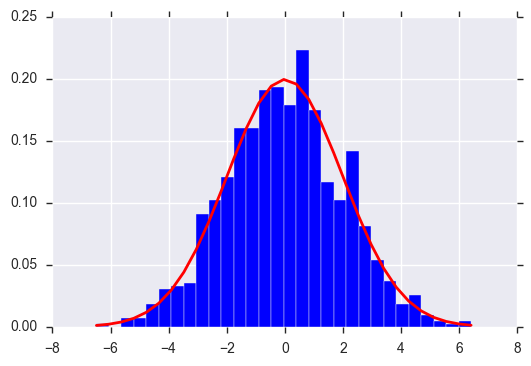

mean=-0.00, sd=2.01
with outlier, mean=0.20, sd=6.63
with outlier, median=-0.03, sd=2.99


In [15]:
mu, sigma = 0, 2 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()
print("mean=%.2f, sd=%.2f"%(np.mean(s), np.std(s)))

# Introduce an outlier
s[983] = 200
print("with outlier, mean=%.2f, sd=%.2f"%(np.mean(s), np.std(s)))

from statsmodels import robust
print("with outlier, median=%.2f, sd=%.2f"%(np.median(s), 1.4826*robust.mad(s)))

In [ ]:
from statsmodels import robust

## Section 4. Scaling, Binning, and Data Transformation

### Scale to between 0 and 1

In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
print(df.head())
print(df.describe())
data_minmax = df.copy()
data_minmax.iloc[:,[0,3,5]] = min_max_scaler.fit_transform(data_minmax.iloc[:,[0,3,5]])
data_minmax.describe()

   age     sex      region   income married  children  car save_act  \
0   48  FEMALE  INNER_CITY  17546.0      NO         1   NO       NO   
1   40    MALE        TOWN  30085.1     YES         3  YES       NO   
2   51  FEMALE  INNER_CITY  16575.4     YES         0  YES      YES   
3   23  FEMALE        TOWN  20375.4     YES         3   NO       NO   
4   57  FEMALE       RURAL  50576.3     YES         0   NO      YES   

  current_act mortgage  pep  
0          NO       NO  YES  
1         YES      YES   NO  
2         YES       NO   NO  
3         YES       NO   NO  
4          NO       NO   NO  
              age        income    children
count  600.000000    600.000000  600.000000
mean    42.395000  27524.031217    1.011667
std     14.424947  12899.468246    1.056752
min     18.000000   5014.210000    0.000000
25%     30.000000  17264.500000    0.000000
50%     42.000000  24925.300000    1.000000
75%     55.250000  36172.675000    2.000000
max     67.000000  63130.100000    3.0000

,age,income,children
count,600.000000,600.000000,600.000000
mean,0.497857,0.387326,0.337222
std,0.294387,0.221961,0.352251
min,0.000000,0.000000,0.000000
25%,0.244898,0.210791,0.000000
50%,0.489796,0.342610,0.333333
75%,0.760204,0.536144,0.666667
max,1.000000,1.000000,1.000000


### z-transaction

In [9]:
from sklearn import preprocessing
data_z = df.copy()
data_z.iloc[:,[0,3,5]] = preprocessing.scale(data_z.iloc[:,[0,3,5]])
data_z.describe()

,age,income,children
count,6.000000e+02,6.000000e+02,6.000000e+02
mean,-2.487825e-16,1.582068e-17,-1.117625e-16
std,1.000834e+00,1.000834e+00,1.000834e+00
min,-1.692578e+00,-1.746475e+00,-9.581346e-01
25%,-8.599922e-01,-7.960089e-01,-9.581346e-01
50%,-2.740596e-02,-2.016284e-01,-1.104933e-02
75%,8.919080e-01,6.710246e-01,9.360359e-01
max,1.707149e+00,2.762577e+00,1.883121e+00


### Binning the Continuous Variable into Bins

Using the Adult Income Data as an example. Data has been read into data frame c in the beginning of this Jupyter Notebook. 

In [10]:
c.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [11]:
import numpy as np
bins = np.linspace(15,70,12) #Generating a sequence with 12 numbers, step size = 5
print(bins) #print the bing definition
age_binned = pd.cut(c.iloc[:,0], bins, right=True, labels=range(11)) # put the age into bins
print("Original value=%d, bin label=%d"%(c.iloc[1,0], age_binned[1]))
print("Original value=%d, bin label=%d"%(c.iloc[2,0], age_binned[2]))

[ 15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.]
Original value=38, bin label=4
Original value=53, bin label=7


### Handle Time Stamps

### TimeStamps in Strings

In [12]:
datestring = "2017/11/06 19:00:13" # A Monday
from datetime import datetime

datetime_object = datetime.strptime(datestring, '%Y/%m/%d %H:%M:%S')
print("Year=%d"%datetime_object.year)
print("Month=%d"%datetime_object.month)
print("Day of Month=%d"%datetime_object.day)
print("Weekday=%d"%datetime_object.weekday())
print("Week Number=%s"%datetime_object.strftime("%U"))
print("Hour=%d"%datetime_object.hour)
print("Minute=%d"%datetime_object.minute)

Year=2017
Month=11
Day of Month=6
Weekday=0
Week Number=45
Hour=19
Minute=0


### Handle Unix Time Stamp

In [24]:
ts = 1352068320
datetime_object = datetime.fromtimestamp(ts)
print(datetime_object)
print("Year=%d"%datetime_object.year)
print("Month=%d"%datetime_object.month)
print("Day of Month=%d"%datetime_object.day)
print("Weekday=%d"%datetime_object.weekday())
print("Week Number=%s"%datetime_object.strftime("%U"))
print("Hour=%d"%datetime_object.hour)
print("Minute=%d"%datetime_object.minute)

2012-11-04 14:32:00
Year=2012
Month=11
Day of Month=4
Weekday=6
Week Number=45
Hour=14
Minute=32
